In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import rotate
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter
from scipy.signal import savgol_filter
import PyQt6

In [11]:
def import_tif_image(filepath):
    image = Image.open(filepath)
    image = image.convert('L')
    array = np.array(image)
    return array

def get_max_index(array):
    flattened_array = array.flatten()
    max_index = np.argmax(flattened_array)
    max_row = max_index // array.shape[1]
    max_col = max_index % array.shape[1]
    return (max_row, max_col)

def gaussian_function(x, amplitude, mean, std_dev, c):
    return amplitude * np.exp(-(x - mean)**2 / (2 * std_dev**2)) + c


def smooth_data(data, sigma):
    smoothed_data = gaussian_filter(data, sigma=sigma)
    return smoothed_data

def smooth_data_savgol(data, window_length, polyorder):
    smoothed_data = savgol_filter(data, window_length=window_length, polyorder=polyorder)
    return smoothed_data



In [12]:
tif_filepath = 'LSC_closedpinhole_40ms_2_7A_1_MMStack_Pos0.ome.tif'
intensity_array = import_tif_image(tif_filepath)

rotated_array = rotate(intensity_array, 2)
rotated_array = smooth_data(rotated_array, sigma= 1)
#rotated_array = smooth_data_savgol(rotated_array, window_length= 10, polyorder= 2)


In [13]:
for i in range(10):
    max_index = get_max_index(rotated_array)
    print(max_index)
    rotated_array[max_index[0], max_index[1]] = 0

xslice = rotated_array[max_index[0], :]
yslice = rotated_array[560:600, max_index[1]]




(563, 619)
(564, 619)
(563, 620)
(563, 618)
(562, 619)
(564, 620)
(564, 618)
(731, 954)
(562, 620)
(730, 954)


In [14]:
initial_guess_x = [80, max_index[0], 50,6]
params_x, params_covariance_x = curve_fit(gaussian_function, range(len(xslice)), xslice) #, p0=initial_guess_x)
print(params_x)

#initial_guess_y = [80, 100, 30, 0]
params_y, params_covariance_y = curve_fit(gaussian_function, range(len(yslice)), yslice) #, p0=initial_guess_y)
print(params_y)


[-1.08674146e-02  2.41520708e+02  3.59080949e+02  1.07427666e-02]
[-0.45444342  4.11373377  3.73345588  0.36988325]


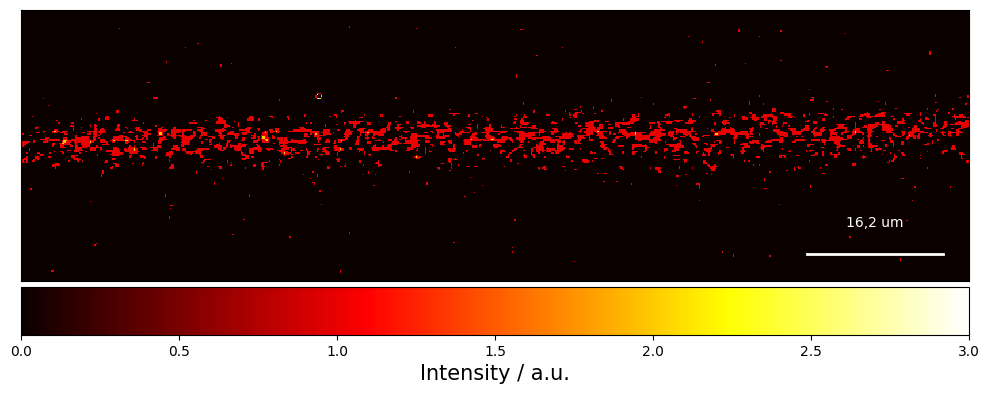

In [21]:
bildausschnitt = rotated_array[500:700, 400:1100]


plt.figure(figsize=(10,4))
plt.imshow(bildausschnitt, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(location='bottom', shrink=1, pad=0.02)
cbar.set_label(label='Intensity / a.u.',size = 15)


scale_bar_length = 100
scale_bar_units = 'pixels'
scale_bar_x = bildausschnitt.shape[1] -120
scale_bar_y = bildausschnitt.shape[0] -20
plt.plot([scale_bar_x, scale_bar_x + scale_bar_length], [scale_bar_y, scale_bar_y], color='white', linewidth=2)
plt.text(scale_bar_x + scale_bar_length / 2, scale_bar_y - 20, f'16,2 um', ha='center', color='white')


plt.xticks([])
plt.yticks([])


plt.tight_layout()
#plt.savefig('LSPinhole.pdf', dpi = 300)

In [16]:
# xfit = np.array(range(len(xslice)))*0.165
# plt.scatter(xfit[::7], xslice[::7], marker = 'x', color = 'r', label = 'data')
# plt.plot(xfit, gaussian_function(xfit,params_x[0],params_x[1]*0.165,params_x[2]*0.165,params_x[3] ),label = 'fit')

# plt.xlim(40, 200)


# plt.legend()
# plt.xlabel('Vertical cut / μm')
# plt.ylabel('Intensity / a.u.')
# plt.title('Gaussian Fit')
# plt.show()


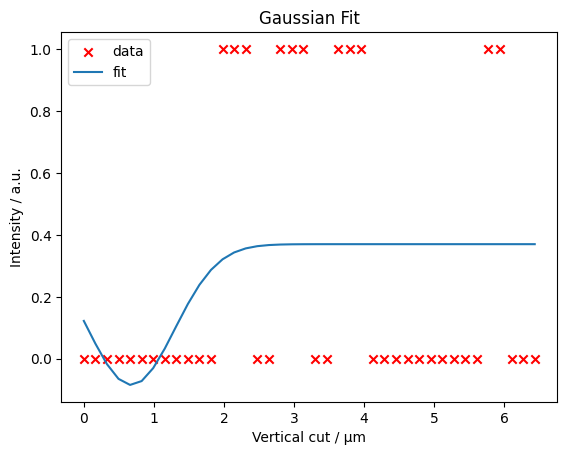

In [17]:
yfit = np.array(range(len(yslice)))*0.165
plt.scatter(yfit, yslice, marker = 'x', color = 'r', label = 'data')
plt.plot(yfit, gaussian_function(yfit,params_y[0],params_y[1]*0.165,params_y[2]*0.165,params_y[3] ),label = 'fit')

# plt.xlim(40, 200)


plt.legend()
plt.xlabel('Vertical cut / μm')
plt.ylabel('Intensity / a.u.')
plt.title('Gaussian Fit')
plt.show()